## Deep Learning Project - Digit Recognizer
### Name - Gayatri Khairnar
### Kaggle rank - 151 

In [1]:
#import all the libraries necessary for DNN

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from tensorflow.keras import regularizers
from keras import layers
from keras_tuner.tuners import RandomSearch
import keras_tuner as kt
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

In [2]:
train = pd.read_csv("C://Users//khair//digit-recognizer//train.csv")
test = pd.read_csv("C://Users//khair//digit-recognizer//test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
#Split train data into label and pixels

X_train = train.drop(['label'],axis=1).astype('int32')
y_train = train['label'].astype('float32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

0.0


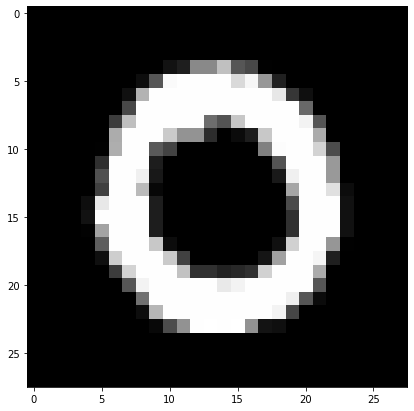

In [8]:
#display or plot a number using the given pixel data

plt.figure(figsize=(7,7))


#reshape from 1d to 2d
grid_data = X_train.loc[1].values.reshape(28,28)
#show image
plt.imshow(grid_data, interpolation = "none", cmap = "gray")

#cross check the image with the number at the index idx
print(y_train[1])

In [9]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train.shape

(42000, 784)

In [11]:
X_test.shape

(28000, 784)

In [12]:
y_train.shape

(42000,)

In [13]:
# reshape and normalize the data for better results

X_train = X_train.values.reshape(-1,28,28,1)
X_train = X_train/255.0
X_test = X_test.values.reshape(-1,28,28,1)
X_test = X_test/255.0

In [14]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [15]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
digit_recognizer_model = keras.Sequential()
digit_recognizer_model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1))),
digit_recognizer_model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
digit_recognizer_model.add(layers.MaxPooling2D(2,2))

digit_recognizer_model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'))
digit_recognizer_model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'))
digit_recognizer_model.add(layers.MaxPooling2D(2,2))

digit_recognizer_model.add(layers.Dropout(0.25))

digit_recognizer_model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
digit_recognizer_model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
digit_recognizer_model.add(layers.MaxPooling2D(2,2))

digit_recognizer_model.add(layers.Dropout(0.25))

digit_recognizer_model.add(layers.Flatten())

digit_recognizer_model.add(layers.Dense(256,activation="relu"))
digit_recognizer_model.add(layers.Dropout(0.50))
digit_recognizer_model.add(layers.Dense(256,activation="relu"))


digit_recognizer_model.add(layers.Dropout(0.50))
digit_recognizer_model.add(layers.Dense(10,activation="softmax"))

In [17]:
digit_recognizer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [18]:
Optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07
)

In [38]:
digit_recognizer_model.compile(
        optimizer='Adadelta',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [45]:
history = digit_recognizer_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 2/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0105 - accuracy: 0.9970
Epoch 3/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0109 - accuracy: 0.9968
Epoch 4/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0105 - accuracy: 0.9971
Epoch 5/10
1313/1313 [==============================] - 41s 32ms/step - loss: 0.0109 - accuracy: 0.9972
Epoch 6/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0121 - accuracy: 0.9966
Epoch 7/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0107 - accuracy: 0.9970
Epoch 8/10
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0116 - accuracy: 0.9967
Epoch 9/10
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0099 - accuracy: 0.9971
Epoch 10/10
1313/1313 [==============================] - 42s 32m

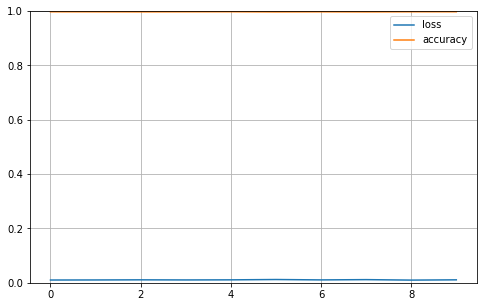

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [47]:
results = digit_recognizer_model.predict(X_test)
results = np.argmax(results,axis=1)
results = pd.Series(results,name="Label")

875/875 [==============================] - 8s 9ms/step


In [48]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

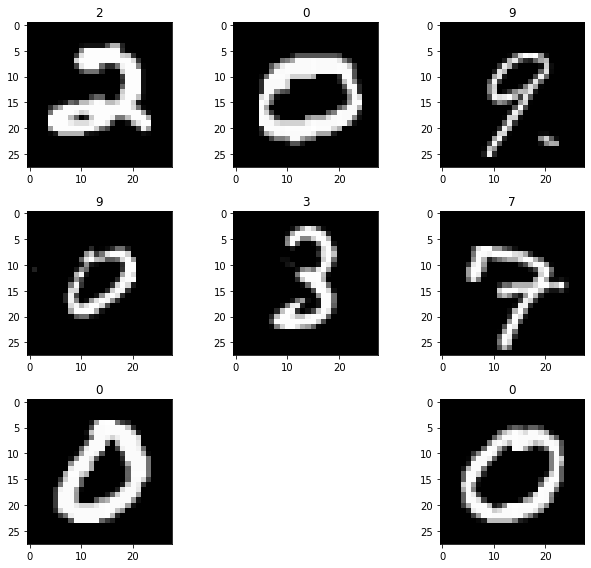

In [49]:
# checking the accurate of my result

def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3, 3, index+1)
    plt.imshow(image_shaped, cmap=plt.cm.gray)
    plt.title(label)

plt.figure(figsize=(9, 8))
sample_test = test.head(9)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
    plt.tight_layout()

In [50]:
# Creating a csv file to submit on Kaggle competition 

submission = pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)
submission.to_csv("C://Users//khair//digit_recognizer_submission1.csv",index=False)